<h1><center> Particle Physics Analysis Tutorial with ATLAS 13 TeV Open Data </center></h1>

<img src="./images/ATLASOD.gif">

Hi everyone! Welcome to the Particle Physics Analysis Tutorial. As shown in the gif above, we will be analysing the data from the ATLAS open data. ATLAS experiment is one of the particle physics experiments at CERN in 2016. The name *ATLAS* is stand for **A** **T**oroidal **L**HC **A**pparatu**S** which is also the name of multipurpose particle detector at Large Hadron Collider (LHC). The ATLAS data have been published (I think not really a real data) for public as educational puropses known as ATLAS Open Data. There are twelve examples of physics analysis can be done using ATLAS open data and the one that we are focusing is **SM Higgs boson production in the H → WW decay channel in the two-lepton final state**. Before we start the tutorial, lets have a read on the theory first on [Brief Introduction to Higgs Boson](http://opendata.atlas.cern/release/2020/documentation/physics/the-higgs-boson.html). Some of you may need to explore about ALTAS open data or want to run all the analysis, go ahead! [ATLAS 13 TeV Open Data Documentation](http://opendata.atlas.cern/release/2020/documentation/index.html).

Now if you are ready, lets start!

# H → WW decay channel in two-lepton final state

There are two different types of data sets will be used in all particle physics experiments which are real data sets which is obtained from the experiment itself and the other one is Monte Carlo (MC) data sets which is obtained from the simulation. The analysis of the real data and MC data is almost the same but some modification is needed when we are working on MC data sets. In this tutorial module, we will only focusing on the real data sets. 

In this notebook, some of us may use interactive visualisation of the histogram that we create later. However, some of us may can't use the interactive visualisation (I am also included). To use interactive visualisation of the histogram, we can use the JSROOT:

In [1]:
//%jsroot on

The JSROOT is optional. The important part is starting now. The first thing to do is to include some basic and standard C++ and ROOT libraries and files into this program. 

In [2]:
#include "TROOT.h"
#include "TChain.h"
#include "TFile.h"
#include "TH1.h"
#include "vector"
#include <iostream>
#include <cstring>
#include <string>
#include <TH1.h>
#include <TStyle.h>
#include <TMath.h>
#include <TLorentzVector.h>
#include <stdio.h>

Define and specify "path" using Tsring Class. This path is where the ATLAS data set is stored in the directory in our computer. For example, this is my directory where the ALTAS data set is stored:

Noted that you need to download "2 lep" data sets (better to download all around 100 GB ...). For you with full storage computer or lazy to download it, we may use an alternative way.

In [3]:
TString path = "/mnt/d/ATLAS 13 TeV Open Datasets/2lep/"; //please sepcify your own path directory
//TString path = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/"; // uisng the URL to the ATLAS Open Data website repository

Since the ATLAS data sets for HWW Analysis is quite big (~25 GB), some of us may dont want to download it. So there is another way to access the data sets without installing it. In the cell above, I already "comment (//)" another path to accessing the data sets, to use this path just "uncomment" the new path and "comment" the old path.  

From my experiences, better to download the data sets because the script will be more faster to execute.

Now, we will use the Tchain object. This Tchain is basically "chain" all the files or samples into single structure which later can be more easier to loop. 

In [4]:
TChain* fChain = new TChain("mini"); //specify Tchain object
fChain->AddFile(path+"Data/data_A.2lep.root"); //Add samples to the chain
fChain->AddFile(path+"Data/data_B.2lep.root"); //Add samples to the chain
fChain->AddFile(path+"Data/data_C.2lep.root"); //Add samples to the chain
fChain->AddFile(path+"Data/data_D.2lep.root"); //Add samples to the chain

Define and extract some variable thats is needed in this analysis. However, not all of them will be used in this analysis, for example the "mcWeight", this variable is needed when we deal with MC data sets. The description for each variable will be available in the [13 TeV ATLAS Open Data branches and variables](http://opendata.atlas.cern/release/2020/documentation/datasets/dataset13.html). Later we will put this variable into the branches. 

In [5]:
Int_t           runNumber; //number uniquely identifying ATLAS data-taking run
Int_t           eventNumber; //event number and run number combined uniquely identifies event
Int_t           channelNumber; //number uniquely identifying ATLAS simulated dataset
Float_t         mcWeight; //weight of a simulated event
Float_t         scaleFactor_PILEUP; //scale-factor for pileup reweighting 
Float_t         scaleFactor_ELE; //scale-factor for electron efficiency 
Float_t         scaleFactor_MUON; //scale-factor for muon efficiency 
Float_t         scaleFactor_PHOTON; //scale-factor for photon efficiency
Float_t         scaleFactor_TAU; //scale-factor for tau efficiency
Float_t         scaleFactor_BTAG; //scale-factor for b-tagging algorithm @70% efficiency
Float_t         scaleFactor_LepTRIGGER; //scale-factor for lepton triggers 
Float_t         scaleFactor_PhotonTRIGGER; //scale-factor for photon triggers 
Float_t         scaleFactor_TauTRIGGER; //scale-factor for tau triggers 
Float_t         scaleFactor_DiTauTRIGGER; //scale-factor for ditau triggers 
Bool_t          trigE; //boolean whether event passes a single-electron trigger
Bool_t          trigM; //boolean whether event passes a single-muon trigger
Bool_t          trigP; //boolean whether event passes a single-photon trigger
Bool_t          trigT; //boolean whether event passes a single-tau trigger
Bool_t          trigDT; //boolean whether event passes a single-ditau trigger
UInt_t          lep_n; //number of pre-selected leptons
vector<bool>    *lep_truthMatched; //boolean indicating whether the lepton is matched to a simulated 
vector<bool>    *lep_trigMatched; //boolean indicating whether the lepton is the one triggering the event
vector<float>   *lep_pt; //transverse momentum of the lepton 
vector<float>   *lep_eta; // pseudo-rapidity, {eta}, of the lepton
vector<float>   *lep_phi; //azimuthal angle, {phi}, of the lepton 
vector<float>   *lep_E; //energy of the lepton
vector<float>   *lep_z0; //z-coordinate of the track associated to the lepton w.r.t. primary vertex
vector<int>     *lep_charge; //charge of the lepton
vector<unsigned int> *lep_type; //number signifying the lepton type (electron or muon)
vector<bool>    *lep_isTightID; //boolean indicating whether lepton satisfies tight ID reconstruction criteria
vector<float>   *lep_ptcone30; //scalar sum of track PT (transverse momentum) in a cone of R=0.3 around lepton, used for tracking isolation 
vector<float>   *lep_etcone20; //scalar sum of track ET (transverse energy) in a cone of R=0.2 around lepton, used for calorimeter isolation
vector<float>   *lep_trackd0pvunbiased; // do of track associated to lepton at point of closest approach (p.c.a.)
vector<float>   *lep_tracksigd0pvunbiased; // do significance of the track associated to lepton at the p.c.a.
Float_t         met_et; //transverse energy of the missing momentum vector
Float_t         met_phi; //azimuthal angle of the missing momentum vector
UInt_t          jet_n; //number of pre-selected jets
vector<float>   *jet_pt; //transverse momentum of the jet 
vector<float>   *jet_eta; //pseudo-rapidity, {eta} of the jet 
vector<float>   *jet_phi; //azimuthal angle, {phi} of the jet 
vector<float>   *jet_E; //energy of the jet
vector<float>   *jet_jvt; // jet vertex tagger discriminant of the jet
vector<int>     *jet_trueflav; //flavour of the simulated jet
vector<bool>    *jet_truthMatched; //boolean indicating whether the jet is matched to a simulated jet
vector<float>   *jet_MV2c10; //output from the multivariate b-tagging algorithm of the jet
UInt_t          photon_n; //number of pre-selected photons
vector<bool>    *photon_truthMatched; //boolean indicating whether the photon is matched to a simulated photon
vector<bool>    *photon_trigMatched; //boolean indicating whether the photon is the one triggering the event 
vector<float>   *photon_pt; //transverse momentum of the photon
vector<float>   *photon_eta; //pseudo-rapidity, {eta} of the photon
vector<float>   *photon_phi; //azimuthal angle, {phi} of the photon
vector<float>   *photon_E; //energy of the photon
vector<bool>    *photon_isTightID; //boolean indicating whether photon satisfies tight identification reconstruction criteria
vector<float>   *photon_ptcone30; //scalar sum of track PT in a cone of R=0.3 around photon 
vector<float>   *photon_etcone20; //scalar sum of track ET in a cone of R=0.2 around photon 
vector<int>     *photon_convType; //information whether and where the photon was converted 
UInt_t          largeRjet_n; //number of pre-selected large-R jets
vector<float>   *largeRjet_pt; //transverse momentum of the large-R jet
vector<float>   *largeRjet_eta; //pseudo-rapidity of the large-R jet
vector<float>   *largeRjet_phi; //azimuthal angle of the large-R jet
vector<float>   *largeRjet_E; //energy of the large-R jet
vector<float>   *largeRjet_m; //invariant mass of the large-R jet
vector<int>     *largeRjet_truthMatched; //information whether the large-R jet is matched to a simulated large-R jet
vector<float>   *largeRjet_D2; //weight from algorithm for W/Z-boson tagging 
vector<float>   *largeRjet_tau32; //weight from algorithm for top-quark tagging 
UInt_t          tau_n; //number of pre-selected hadronically decaying tau-lepton
vector<float>   *tau_pt; //transverse momentum of the hadronically decaying tau-lepton 
vector<float>   *tau_eta; //pseudo-rapidity of the hadronically decaying tau-lepton 
vector<float>   *tau_phi; //azimuthal angle of the hadronically decaying tau-lepton 
vector<float>   *tau_E; //energy of the hadronically decaying tau-lepton
vector<bool>    *tau_isTightID; //boolean indicating whether hadronically decaying tau-lepton satisfies tight ID reconstruction criteria 
vector<bool>    *tau_truthMatched; //boolean indicating whether the hadronically decaying tau-lepton is matched to a simulated r-lepton 
vector<bool>    *tau_trigMatched; //boolean signifying whether the tau-lepton is the one triggering the event
vector<int>     *tau_nTracks; //number of tracks in the hadronically decaying tau-lepton decay
vector<float>   *tau_BDTid; //output of the multivariate algorithm discriminating hadronically decaying tau-leptons from jets 
Float_t         ditau_m; //di-tau invariant mass using the missing-mass calculator 
vector<float>   *truth_pt; //transverse momentum at the truth level
vector<float>   *truth_eta; //pseudo-rapidity at the truth level
vector<float>   *truth_phi; //azimuthal angle at the truth level
vector<float>   *truth_E; //energy at the truth level
vector<int>     *truth_pdgid; //PDG ID (particle id) at truth level
vector<float>   *lep_pt_syst; //single component syst. uncert. (lepton momentum scale and resolution) affecting lep_pt 
Float_t         met_et_syst; //single component syst. uncert. (ETmiss (transverse missing energy) scale and resolution) affecting met_pt
vector<float>   *jet_pt_syst; //single component syst. uncert. (jet energy scale) affecting jet_pt
vector<float>   *photon_pt_syst; //single component syst. uncert. (photon energy scale and resolution) affecting photon_pt
vector<float>   *largeRjet_pt_syst; //single component syst. uncert. (large-R jet energy resolution) affecting largeRjet_pt
vector<float>   *tau_pt_syst; //single component syst. uncert. (tau-lepton reconstruction and energy scale) affecting tau_pt

Declaration of the branch using TBranch class.

In [6]:
TBranch        *b_runNumber;   
TBranch        *b_eventNumber;   
TBranch        *b_channelNumber;   
TBranch        *b_mcWeight;   
TBranch        *b_scaleFactor_PILEUP;   
TBranch        *b_scaleFactor_ELE;   
TBranch        *b_scaleFactor_MUON;   
TBranch        *b_scaleFactor_PHOTON;   
TBranch        *b_scaleFactor_TAU;   
TBranch        *b_scaleFactor_BTAG;   
TBranch        *b_scaleFactor_LepTRIGGER;   
TBranch        *b_scaleFactor_PhotonTRIGGER;   
TBranch        *b_scaleFactor_TauTRIGGER;   
TBranch        *b_scaleFactor_DiTauTRIGGER;   
TBranch        *b_trigE;   
TBranch        *b_trigM;   
TBranch        *b_trigP;   
TBranch        *b_trigT;   
TBranch        *b_trigDT;   
TBranch        *b_lep_n;   
TBranch        *b_lep_truthMatched;   
TBranch        *b_lep_trigMatched;   
TBranch        *b_lep_pt;   
TBranch        *b_lep_eta;   
TBranch        *b_lep_phi;   
TBranch        *b_lep_E;   
TBranch        *b_lep_z0;   
TBranch        *b_lep_charge;   
TBranch        *b_lep_type;   
TBranch        *b_lep_isTightID;   
TBranch        *b_lep_ptcone30;   
TBranch        *b_lep_etcone20;   
TBranch        *b_lep_trackd0pvunbiased;   
TBranch        *b_lep_tracksigd0pvunbiased;   
TBranch        *b_met_et;   
TBranch        *b_met_phi;   
TBranch        *b_jet_n;   
TBranch        *b_jet_pt;   
TBranch        *b_jet_eta;   
TBranch        *b_jet_phi;   
TBranch        *b_jet_E;   
TBranch        *b_jet_jvt;   
TBranch        *b_jet_trueflav;   
TBranch        *b_jet_truthMatched;   
TBranch        *b_jet_MV2c10;   
TBranch        *b_photon_n;   
TBranch        *b_photon_truthMatched;   
TBranch        *b_photon_trigMatched;   
TBranch        *b_photon_pt;   
TBranch        *b_photon_eta;   
TBranch        *b_photon_phi;   
TBranch        *b_photon_E;   
TBranch        *b_photon_isTightID;   
TBranch        *b_photon_ptcone30;   
TBranch        *b_photon_etcone20;   
TBranch        *b_largeRjet_n;   
TBranch        *b_largeRjet_pt;   
TBranch        *b_largeRjet_eta;   
TBranch        *b_largeRjet_phi;   
TBranch        *b_largeRjet_E;   
TBranch        *b_largeRjet_m;   
TBranch        *b_largeRjet_truthMatched;   
TBranch        *b_largeRjet_D2;   
TBranch        *b_largeRjet_tau32;   
TBranch        *b_tau_n;   
TBranch        *b_tau_pt;   
TBranch        *b_tau_eta;   
TBranch        *b_tau_phi;   
TBranch        *b_tau_E;   
TBranch        *b_tau_isTightID;   
TBranch        *b_tau_truthMatched;   
TBranch        *b_tau_trigMatched;   
TBranch        *b_tau_nTracks;   
TBranch        *b_tau_BDTid;   
TBranch        *b_ditau_m;   
TBranch        *b_truth_pt;   
TBranch        *b_truth_eta;   
TBranch        *b_truth_phi;   
TBranch        *b_truth_E;   
TBranch        *b_truth_pdgid;   
TBranch        *b_lep_pt_syst;   
TBranch        *b_met_et_syst;   
TBranch        *b_jet_pt_syst;   
TBranch        *b_photon_pt_syst;   
TBranch        *b_largeRjet_pt_syst;   
TBranch        *b_tau_pt_syst;   

Set the branch address to the chain. This is where we will set all the variables (known as leaves) and branches into the chain. Like connecting them together. This is done so that we can store the value of the variable at the right place.

In [7]:
fChain->SetBranchAddress("runNumber", &runNumber, &b_runNumber);
fChain->SetBranchAddress("eventNumber", &eventNumber, &b_eventNumber);
fChain->SetBranchAddress("channelNumber", &channelNumber, &b_channelNumber);
fChain->SetBranchAddress("mcWeight", &mcWeight, &b_mcWeight);
fChain->SetBranchAddress("scaleFactor_PILEUP", &scaleFactor_PILEUP, &b_scaleFactor_PILEUP);
fChain->SetBranchAddress("scaleFactor_ELE", &scaleFactor_ELE, &b_scaleFactor_ELE);
fChain->SetBranchAddress("scaleFactor_MUON", &scaleFactor_MUON, &b_scaleFactor_MUON);
fChain->SetBranchAddress("scaleFactor_PHOTON", &scaleFactor_PHOTON, &b_scaleFactor_PHOTON);
fChain->SetBranchAddress("scaleFactor_TAU", &scaleFactor_TAU, &b_scaleFactor_TAU);
fChain->SetBranchAddress("scaleFactor_BTAG", &scaleFactor_BTAG, &b_scaleFactor_BTAG);
fChain->SetBranchAddress("scaleFactor_LepTRIGGER", &scaleFactor_LepTRIGGER, &b_scaleFactor_LepTRIGGER);
fChain->SetBranchAddress("scaleFactor_PhotonTRIGGER", &scaleFactor_PhotonTRIGGER, &b_scaleFactor_PhotonTRIGGER);
fChain->SetBranchAddress("trigE", &trigE, &b_trigE);
fChain->SetBranchAddress("trigM", &trigM, &b_trigM);
fChain->SetBranchAddress("trigP", &trigP, &b_trigP);
fChain->SetBranchAddress("lep_n", &lep_n, &b_lep_n);
fChain->SetBranchAddress("lep_truthMatched", &lep_truthMatched, &b_lep_truthMatched);
fChain->SetBranchAddress("lep_trigMatched", &lep_trigMatched, &b_lep_trigMatched);
fChain->SetBranchAddress("lep_pt", &lep_pt, &b_lep_pt);
fChain->SetBranchAddress("lep_eta", &lep_eta, &b_lep_eta);
fChain->SetBranchAddress("lep_phi", &lep_phi, &b_lep_phi);
fChain->SetBranchAddress("lep_E", &lep_E, &b_lep_E);
fChain->SetBranchAddress("lep_z0", &lep_z0, &b_lep_z0);
fChain->SetBranchAddress("lep_charge", &lep_charge, &b_lep_charge);
fChain->SetBranchAddress("lep_type", &lep_type, &b_lep_type);
fChain->SetBranchAddress("lep_isTightID", &lep_isTightID, &b_lep_isTightID);
fChain->SetBranchAddress("lep_ptcone30", &lep_ptcone30, &b_lep_ptcone30);
fChain->SetBranchAddress("lep_etcone20", &lep_etcone20, &b_lep_etcone20);
fChain->SetBranchAddress("lep_trackd0pvunbiased", &lep_trackd0pvunbiased, &b_lep_trackd0pvunbiased);
fChain->SetBranchAddress("lep_tracksigd0pvunbiased", &lep_tracksigd0pvunbiased, &b_lep_tracksigd0pvunbiased);
fChain->SetBranchAddress("met_et", &met_et, &b_met_et);
fChain->SetBranchAddress("met_phi", &met_phi, &b_met_phi);
fChain->SetBranchAddress("jet_n", &jet_n, &b_jet_n);
fChain->SetBranchAddress("jet_pt", &jet_pt, &b_jet_pt);
fChain->SetBranchAddress("jet_eta", &jet_eta, &b_jet_eta);
fChain->SetBranchAddress("jet_phi", &jet_phi, &b_jet_phi);
fChain->SetBranchAddress("jet_E", &jet_E, &b_jet_E);
fChain->SetBranchAddress("jet_jvt", &jet_jvt, &b_jet_jvt);
fChain->SetBranchAddress("jet_trueflav", &jet_trueflav, &b_jet_trueflav);
fChain->SetBranchAddress("jet_truthMatched", &jet_truthMatched, &b_jet_truthMatched);
fChain->SetBranchAddress("jet_MV2c10", &jet_MV2c10, &b_jet_MV2c10);
fChain->SetBranchAddress("lep_pt_syst", &lep_pt_syst, &b_lep_pt_syst);
fChain->SetBranchAddress("met_et_syst", &met_et_syst, &b_met_et_syst);
fChain->SetBranchAddress("jet_pt_syst", &jet_pt_syst, &b_jet_pt_syst);
fChain->SetBranchAddress("photon_pt_syst", &photon_pt_syst, &b_photon_pt_syst);
fChain->SetBranchAddress("largeRjet_pt_syst", &largeRjet_pt_syst, &b_largeRjet_pt_syst);
fChain->SetBranchAddress("tau_pt_syst", &tau_pt_syst, &b_tau_pt_syst);

Define and create 1D histograms using TH1F and specify them with (in order w.r.t. script) histogram name, title (histogram ; x-axis ; y-axis) , number of bins, and range of the x-axis. 

Here, we will create 16 histograms in total, 8 histograms for before cut and another 8 histograms for after cut. We will create histograms for some parameter such as mass of dilepton, transverse momentum of dilepton, azimuthal angle of dilepton system and more as listed in the declaration of histogram below.

In [8]:
//Histograms declaration before cut
histI_mLL          = new TH1F("histI_mLL",       "Mass of Dilepton System; m_{ll} [GeV];Events / bin", 30, 0, 170);
histI_ptLL         = new TH1F("histI_ptLL",      "Transverse Momentum of Dilepton System; p_{T}^{ll} [GeV];Events / bin", 30, 0, 200);
histI_dPhi_LL      = new TH1F("histI_dPhi_LL",   "dPhi_LL Dilepton System; #Delta#phi (ll);Events / bin", 20, 0, 3.2);
histI_dPhiLLmet    = new TH1F("histI_dPhiLLmet", "dPhiLLmet Dilepton System; #Delta#phi (ll,E_{T}^{miss});Events / bin", 30, 0, 3.2);
histI_etmiss       = new TH1F("histI_etmiss",    "Missing Transverse Momentum;E_{T}^{miss} [GeV];Events / bin", 20, 0,200);
histI_mt           = new TH1F("histI_mt",        "Dilepton System Transverse Mass; m_{T} [GeV];Events / bin", 15, 50, 200);
histI_n_jets       = new TH1F("histI_n_jets",    "Number of Jets;N_{jets};Events / bin", 5, -0.5, 4.5);
histI_n_bjets      = new TH1F("histI_n_bjets",   "Number of b-Jets;N_{b-jets};Events / bin", 3, -0.5, 2.5);

//Histograms declaration after cut
hist_mLL          = new TH1F("hist_mLL",       "Mass of Dilepton System; m_{ll} [GeV];Events / bin", 30, 0, 170);
hist_ptLL         = new TH1F("hist_ptLL",      "Transverse Momentum of Dilepton System; p_{T}^{ll} [GeV];Events / bin", 30, 0, 200);
hist_dPhi_LL      = new TH1F("hist_dPhi_LL",   "dPhi_LL Dilepton System; #Delta#phi (ll);Events / bin", 20, 0, 3.2);
hist_dPhiLLmet    = new TH1F("hist_dPhiLLmet", "dPhiLLmet Dilepton System; #Delta#phi (ll,E_{T}^{miss});Events / bin", 30, 0, 3.2);
hist_etmiss       = new TH1F("hist_etmiss",    "Missing Transverse Momentum;E_{T}^{miss} [GeV];Events / bin", 20, 0,200);
hist_mt           = new TH1F("hist_mt",        "Dilepton System Transverse Mass; m_{T} [GeV];Events / bin", 15, 50, 200);
hist_n_jets       = new TH1F("hist_n_jets",    "Number of Jets;N_{jets};Events", 5, -0.5, 4.5);
hist_n_bjets      = new TH1F("hist_n_bjets",   "Number of b-Jets;N_{b-jets};Events", 3, -0.5, 2.5);

Now, we will define some integer including number of entries, number of bytes and "i" for looping purposes. Specify and print number of entries.

In [9]:
int nentries, nbytes, i; //define new integer

nentries = (Int_t)fChain->GetEntries(); //get the number of entries in chained data sets

std::cout << "* Total number of entries to analyse: " << nentries << std::endl; //print the number of entries

* Total number of entries to analyse: 12205790


Next, the most important part where the main analysis is created here. This analysis may take more time around 5 to 10 minutes if the data sets is downloaded, if you are using link as the path directory, it may take more time.

In [10]:
for (i=0; i < nentries; i++) //create for loop at each event from start to end number of events 
{
    nbytes =  fChain->GetEntry(i); 
      
      //Preselection cut for electron/muon trigger 
      if(trigE || trigM) 
    {
  
      //Preselection of good leptons
      int goodlep_index[2]; //Give the vector a size good enough to avoid segmentation faults due to events with more than 2 leptons.
      int goodlep_n = 0; //Total number of good lepton
      int lep_index =0;
      
      for(unsigned int i=0; i<lep_n; i++) //Loop using number lepton available
        {

              TLorentzVector leptemp;  leptemp.SetPtEtaPhiE(lep_pt->at(i)/1000., lep_eta->at(i), lep_phi->at(i), lep_E->at(i)/1000.);
          
          //Lepton is Tight
          if( lep_isTightID->at(i) )
            {
          
          //Standard lepton isolation requirement => strict isolation
             if( lep_pt->at(i) >15000. && ( (lep_ptcone30->at(i)/lep_pt->at(i)) < 0.1) && ( (lep_etcone20->at(i) / lep_pt->at(i)) < 0.1 ) )
                 {
              //Electron selection
              if ( lep_type->at(i)==11 && TMath::Abs(lep_eta->at(i)) < 2.47 && ( TMath::Abs(lep_eta->at(i)) < 1.37 || TMath::Abs(lep_eta->at(i)) > 1.52 ) ) {
            if( TMath::Abs(lep_trackd0pvunbiased->at(i))/lep_tracksigd0pvunbiased->at(i) < 5 && TMath::Abs(lep_z0->at(i)*TMath::Sin(leptemp.Theta())) < 0.5) {
              goodlep_n = goodlep_n + 1;
              goodlep_index[lep_index] = i;
              lep_index++;
            }
              }
              //Muon selection
              if ( lep_type->at(i) ==13 && TMath::Abs(lep_eta->at(i)) < 2.5 ) {
            if( TMath::Abs(lep_trackd0pvunbiased->at(i))/lep_tracksigd0pvunbiased->at(i) < 3 && TMath::Abs(lep_z0->at(i)*TMath::Sin(leptemp.Theta())) < 0.5) {
              goodlep_n = goodlep_n + 1;
              goodlep_index[lep_index] = i;
              lep_index++;
            }
              }
            }
        }// tight
            }
      
      
      //Exactly two good leptons, leading lepton with pT > 22 GeV and the subleading lepton with pT > 15 GeV
      if(goodlep_n==2)
        {
          
          int goodlep1_index = goodlep_index[0];
          int goodlep2_index = goodlep_index[1];
          
              if(lep_pt->at(goodlep1_index) > 22000)
        {
          
          //two different-flavour opposite-sign leptons
          if ( lep_charge->at(goodlep1_index) * lep_charge->at(goodlep2_index)  < 0 ) 
            {
              if ( lep_type->at(goodlep1_index) != lep_type->at(goodlep2_index) )
            {
              
              // TLorentzVector definitions
              TLorentzVector Lepton_1  = TLorentzVector();
              TLorentzVector Lepton_2  = TLorentzVector();
              TLorentzVector      MeT  = TLorentzVector();
              
              Lepton_1.SetPtEtaPhiE(lep_pt->at(goodlep1_index), lep_eta->at(goodlep1_index), lep_phi->at(goodlep1_index),lep_E->at(goodlep1_index));
              Lepton_2.SetPtEtaPhiE(lep_pt->at(goodlep2_index), lep_eta->at(goodlep2_index), lep_phi->at(goodlep2_index),lep_E->at(goodlep2_index));
              MeT.SetPtEtaPhiE(met_et, 0, met_phi , met_et);
              
              TLorentzVector     Lepton_12 = TLorentzVector();
              Lepton_12 = Lepton_1 + Lepton_2;
                  
              //Define and declare the variable later to be put in the histograms
              float mLL       = Lepton_12.Mag()/1000.; //Mass of dilepton system
              float ptLL      = Lepton_12.Pt()/1000.; //Transverse momententum of dilepton system
              
              float dPhi_LL  = TMath::Abs(lep_phi->at(goodlep1_index) - lep_phi->at(goodlep2_index) ); //Azimuthal angle of dilepton system
              dPhi_LL        = dPhi_LL < TMath::Pi() ? dPhi_LL : 2*TMath::Pi() - dPhi_LL; 
              
              Float_t MET = met_et/1000.; //Missing transverse momentum 
              
              float dPhiLLmet = TMath::Abs( Lepton_12.Phi() - MeT.Phi() ); //azimuthal angle of the missing momentum vector
              dPhiLLmet    = dPhiLLmet < TMath::Pi() ? dPhiLLmet : 2*TMath::Pi() - dPhiLLmet;
              
              float mt    = sqrt(2*Lepton_12.Pt()*MeT.Et()*(1-cos(Lepton_12.DeltaPhi(MeT))))/1000.; //Transverse mass of dilepton system
              
              
              //Preselection of good jets
              int goodjet_n = 0;
              int goodbjet_n = 0;
              
              int goodjet_index[jet_n];
              int jet_index = 0;
              
              int goodbjet_index[jet_n];
              int bjet_index = 0;
              
              for(unsigned int i=0; i<jet_n; i++)
                {
                  if(jet_pt->at(i) > 20000. && TMath::Abs(jet_eta->at(i)) < 2.5)
                {
                  //JVT cleaning
                  bool jvt_pass=true;
                  if (jet_pt->at(i) < 60000. && TMath::Abs(jet_eta->at(i)) < 2.4 && jet_jvt->at(i) < 0.59) jvt_pass=false;
                  if (jvt_pass)
                    {
                      //Cut on 85% WP
                      if ( jet_MV2c10->at(i) > 0.1758475  && TMath::Abs(jet_eta->at(i)) < 2.5 )
                    {
                      goodbjet_n++;
                      goodbjet_index[bjet_index] = i;
                      bjet_index++;
                    }
                      
                      if (jet_pt->at(i)>30000.)
                    {
                      goodjet_n++;
                      goodjet_index[jet_index] = i;
                      jet_index++;
                    }
                          
                    }
                }
                }
              
                //Fill histograms before any cut
                histI_mLL->Fill(mLL);
                histI_ptLL->Fill(ptLL);
                histI_dPhi_LL->Fill(dPhi_LL);
                histI_dPhiLLmet->Fill(dPhiLLmet);
                histI_etmiss->Fill(MET);
                histI_mt->Fill(mt);
                histI_n_jets->Fill((double)goodjet_n);
                histI_n_bjets->Fill((double)goodbjet_n);
            

               //Remove low mass meson resonances and DY events; ggF regions, at least 1 jet //condition needed to apply cut
              if ( mLL > 10 && goodjet_n <= 1 && MET > 20)
                {
                  if ( dPhiLLmet > TMath::Pi()/2 )
                  
                  if ( ptLL > 30 )
                    {
                      
                      if ( mLL < 55 )
                    {
                      
                      if ( dPhi_LL < 1.8 ) 
                        {      
          
                          if ( goodbjet_n ==0 ) 
                        {
    
                              
                         //Fill histograms after the cuts
                         hist_mLL->Fill(mLL);
                         hist_ptLL->Fill(ptLL);
                         hist_dPhi_LL->Fill(dPhi_LL);
                         hist_dPhiLLmet->Fill(dPhiLLmet);
                         hist_etmiss->Fill(MET);
                         hist_mt->Fill(mt);
                         hist_n_jets->Fill((double)goodjet_n);
                         hist_n_bjets->Fill((double)goodbjet_n);
                          
      
                        }
                        }
                    }
                    }      
                } 
                }
            }
            }
        }
        }
    }
    

Now, the plotting part. We will create two Canvas using Tcanvas class, then set the line and fill colour for each histogram. We will do some multiple plot in a single canva for 4 histogram by arrangement of two by two. So there will be 4 histograms in one canvas, so that there should be 8 histograms in total from two canvas (4 histos in 1 canvas).

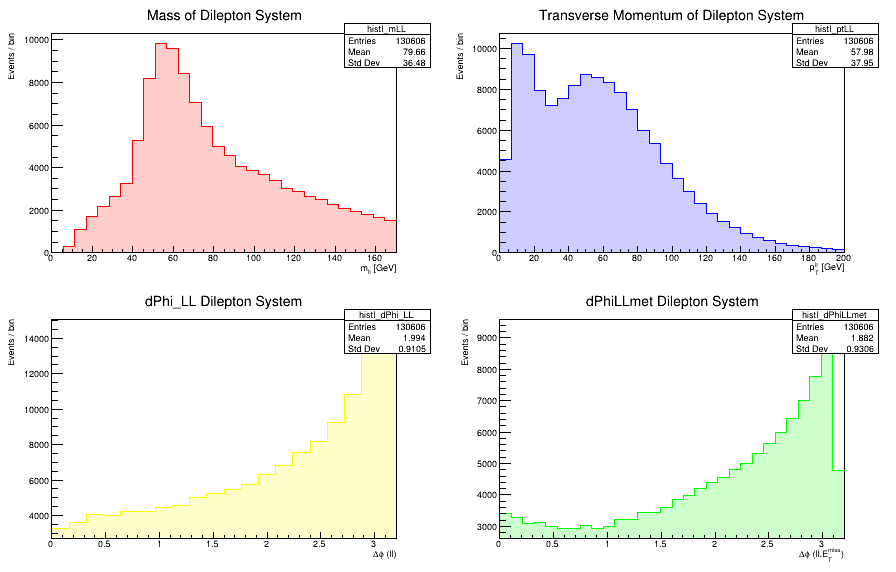

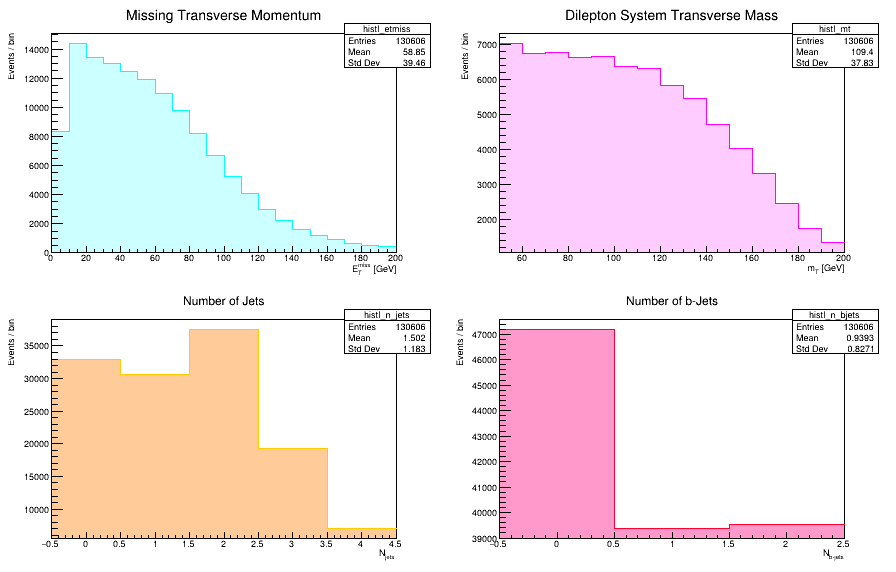

In [11]:
//Create two different canvas
TCanvas *Canva1 = new TCanvas("Canva1","Canva1",10,10,900,600); 
TCanvas *Canva2 = new TCanvas("Canva2","Canva2",10,10,900,600);

//Set line and fill colour red
histI_mLL->SetLineColor(kRed);
histI_mLL->SetFillColor(kRed-10);

//Set line and fill colour blue
histI_ptLL->SetLineColor(kBlue);
histI_ptLL->SetFillColor(kBlue-10);

//Set line and fill colour yellow
histI_dPhi_LL->SetLineColor(kYellow);
histI_dPhi_LL->SetFillColor(kYellow-10);

//Set line and fill colour green
histI_dPhiLLmet->SetLineColor(kGreen);
histI_dPhiLLmet->SetFillColor(kGreen-10);

//Set line and fill colour cyan
histI_etmiss->SetLineColor(kCyan);
histI_etmiss->SetFillColor(kCyan-10);

//Set line and fill colour magenta
histI_mt->SetLineColor(kMagenta);
histI_mt->SetFillColor(kMagenta-10);

//Set line and fill colour orange
histI_n_jets->SetLineColor(kOrange);
histI_n_jets->SetFillColor(kOrange-9);

//Set line and fill colour pink
histI_n_bjets->SetLineColor(kPink);
histI_n_bjets->SetFillColor(kPink+1);

//Split/Devide both canvas into two by two arrangement
Canva1->Divide(2,2);
Canva2->Divide(2,2);

//Fill and draw "slot" 1 canvas 1 by histI_mLL
Canva1->cd(1);
histI_mLL->Draw("HIST");

//Fill and draw "slot" 2 canvas 1 by histI_ptLL
Canva1->cd(2);
histI_ptLL->Draw("HIST");

//Fill and draw "slot" 3 canvas 1 by histI_dPhi_LL
Canva1->cd(3);
histI_dPhi_LL->Draw("HIST");

//Fill and draw "slot" 4 canvas 1 by histI_dPhiLLmet
Canva1->cd(4);
histI_dPhiLLmet->Draw("HIST");

//Fill and draw "slot" 1 canvas 2 by histI_etmiss
Canva2->cd(1);
histI_etmiss->Draw("HIST");

//Fill and draw "slot" 2 canvas 2 by histI_mt
Canva2->cd(2);
histI_mt->Draw("HIST");

//Fill and draw "slot" 3 canvas 3 by histI_n_jets
Canva2->cd(3);
histI_n_jets->Draw("HIST");

//Fill and draw "slot" 4 canvas 4 by histI_n_bjets
Canva2->cd(4);
histI_n_bjets->Draw("HIST");

//Draw Canvas
Canva1->Draw("HIST");
Canva2->Draw("HIST");

The histograms above is for pre-cut condition. We will create new canvas and use the exact same script from the cell before to plot the histograms after-cut condition.

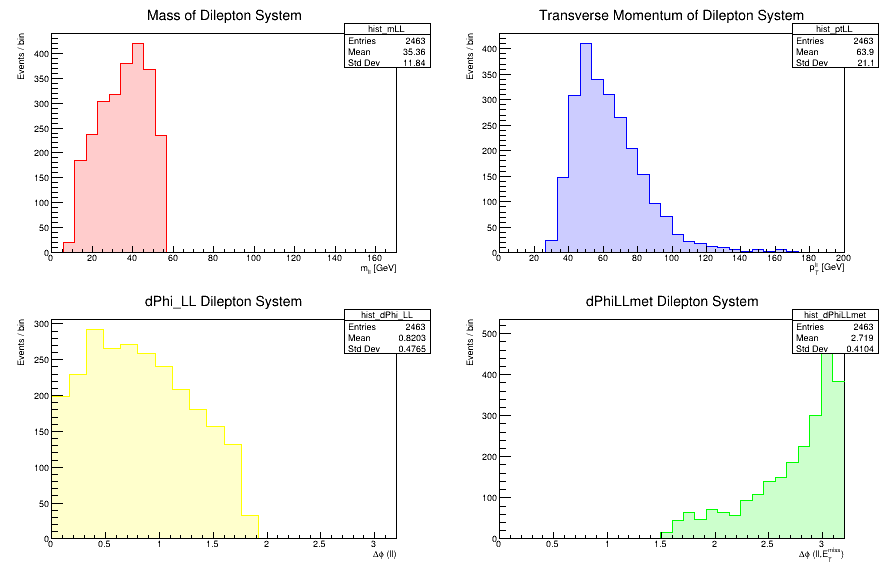

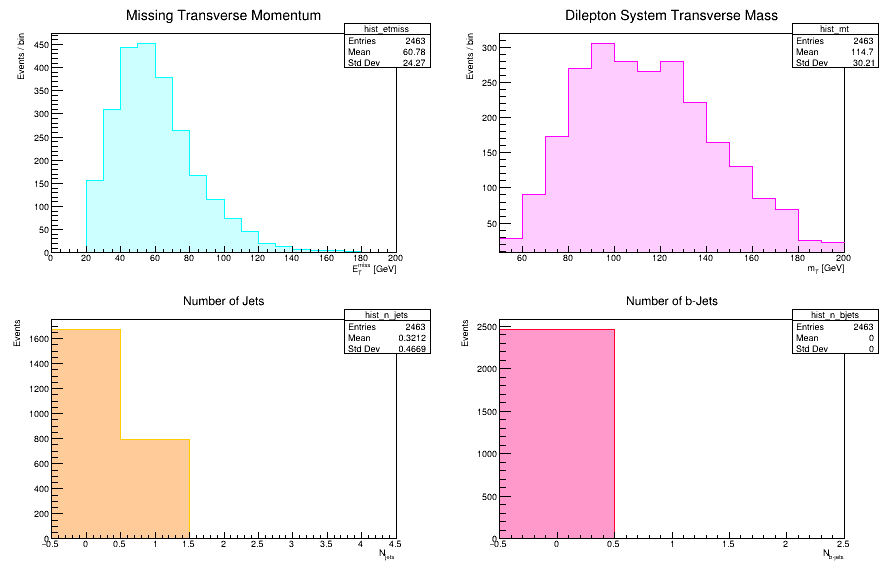

In [12]:
TCanvas *Canva3 = new TCanvas("Canva3","Canva3",10,10,900,600);
TCanvas *Canva4 = new TCanvas("Canva4","Canva4",10,10,900,600);

hist_mLL->SetLineColor(kRed);
hist_mLL->SetFillColor(kRed-10);

hist_ptLL->SetLineColor(kBlue);
hist_ptLL->SetFillColor(kBlue-10);

hist_dPhi_LL->SetLineColor(kYellow);
hist_dPhi_LL->SetFillColor(kYellow-10);

hist_dPhiLLmet->SetLineColor(kGreen);
hist_dPhiLLmet->SetFillColor(kGreen-10);

hist_etmiss->SetLineColor(kCyan);
hist_etmiss->SetFillColor(kCyan-10);

hist_mt->SetLineColor(kMagenta);
hist_mt->SetFillColor(kMagenta-10);

hist_n_jets->SetLineColor(kOrange);
hist_n_jets->SetFillColor(kOrange-9);

hist_n_bjets->SetLineColor(kPink);
hist_n_bjets->SetFillColor(kPink+1);

Canva3->Divide(2,2);
Canva4->Divide(2,2);

Canva3->cd(1);
hist_mLL->Draw("HIST");

Canva3->cd(2);
hist_ptLL->Draw("HIST");

Canva3->cd(3);
hist_dPhi_LL->Draw("HIST");

Canva3->cd(4);
hist_dPhiLLmet->Draw("HIST");

Canva4->cd(1);
hist_etmiss->Draw("HIST");

Canva4->cd(2);
hist_mt->Draw("HIST");

Canva4->cd(3);
hist_n_jets->Draw("HIST");

Canva4->cd(4);
hist_n_bjets->Draw("HIST");

Canva3->Draw("HIST");
Canva4->Draw("HIST");

Well actually I have better idea on how to arrange the histogram, lets create another canvas and put the histogram look clearer and cleaner.

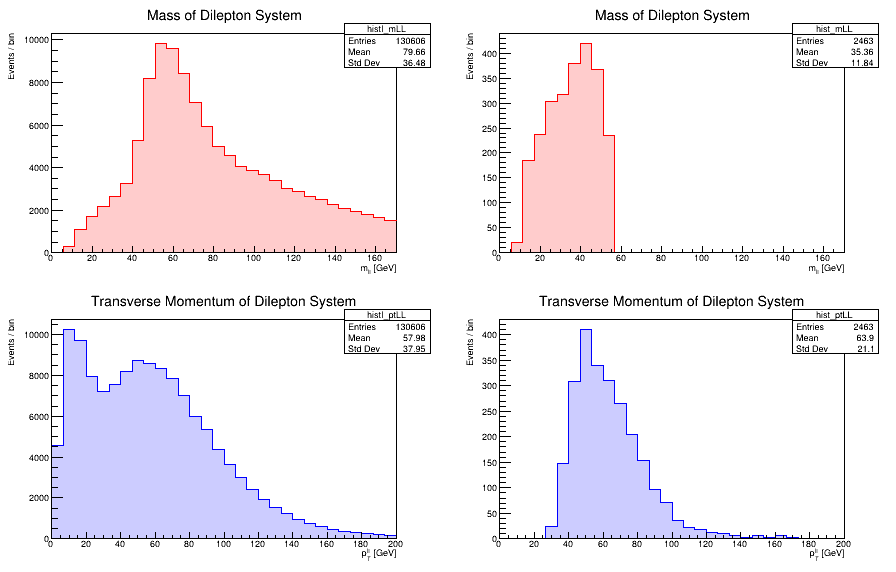

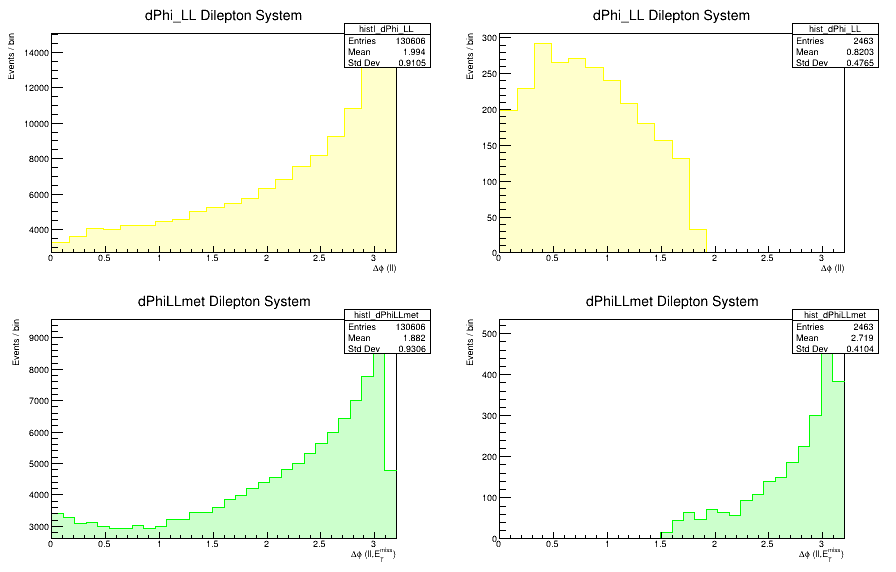

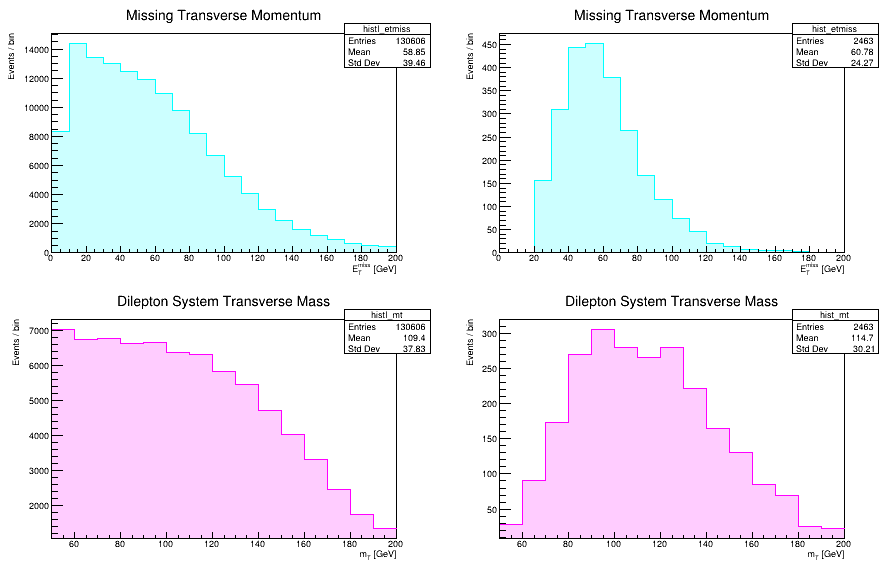

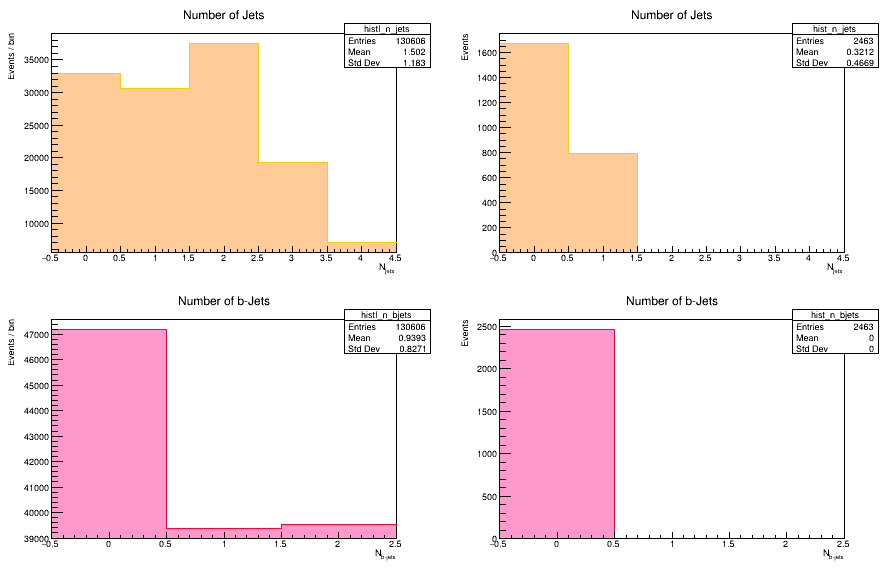

In [13]:
TCanvas *Canva5 = new TCanvas("Canva5","Canva5",10,10,900,600);
TCanvas *Canva6 = new TCanvas("Canva6","Canva6",10,10,900,600);
TCanvas *Canva7 = new TCanvas("Canva7","Canva7",10,10,900,600);
TCanvas *Canva8 = new TCanvas("Canva8","Canva8",10,10,900,600);

histI_mLL->SetLineColor(kRed);
histI_mLL->SetFillColor(kRed-10);

hist_mLL->SetLineColor(kRed);
hist_mLL->SetFillColor(kRed-10);

histI_ptLL->SetLineColor(kBlue);
histI_ptLL->SetFillColor(kBlue-10);

hist_ptLL->SetLineColor(kBlue);
hist_ptLL->SetFillColor(kBlue-10);

hist_dPhi_LL->SetLineColor(kYellow);
hist_dPhi_LL->SetFillColor(kYellow-10);

histI_dPhi_LL->SetLineColor(kYellow);
histI_dPhi_LL->SetFillColor(kYellow-10);

histI_dPhiLLmet->SetLineColor(kGreen);
histI_dPhiLLmet->SetFillColor(kGreen-10);


hist_dPhiLLmet->SetLineColor(kGreen);
hist_dPhiLLmet->SetFillColor(kGreen-10);

histI_etmiss->SetLineColor(kCyan);
histI_etmiss->SetFillColor(kCyan-10);


hist_etmiss->SetLineColor(kCyan);
hist_etmiss->SetFillColor(kCyan-10);

histI_mt->SetLineColor(kMagenta);
histI_mt->SetFillColor(kMagenta-10);

hist_mt->SetLineColor(kMagenta);
hist_mt->SetFillColor(kMagenta-10);

histI_n_jets->SetLineColor(kOrange);
histI_n_jets->SetFillColor(kOrange-9);

hist_n_jets->SetLineColor(kOrange);
hist_n_jets->SetFillColor(kOrange-9);

histI_n_bjets->SetLineColor(kPink);
histI_n_bjets->SetFillColor(kPink+1);

hist_n_bjets->SetLineColor(kPink);
hist_n_bjets->SetFillColor(kPink+1);


Canva5->Divide(2,2);
Canva6->Divide(2,2);
Canva7->Divide(2,2);
Canva8->Divide(2,2);


Canva5->cd(1);
histI_mLL->Draw("HIST");

Canva5->cd(2);
hist_mLL->Draw("HIST");


Canva5->cd(3);
histI_ptLL->Draw("HIST");


Canva5->cd(4);
hist_ptLL->Draw("HIST");


Canva6->cd(1);
histI_dPhi_LL->Draw("HIST");


Canva6->cd(2);
hist_dPhi_LL->Draw("HIST");


Canva6->cd(3);
histI_dPhiLLmet->Draw("HIST");


Canva6->cd(4);
hist_dPhiLLmet->Draw("HIST");


Canva7->cd(1);
histI_etmiss->Draw("HIST");


Canva7->cd(2);
hist_etmiss->Draw("HIST");


Canva7->cd(3);
histI_mt->Draw("HIST");


Canva7->cd(4);
hist_mt->Draw("HIST");


Canva8->cd(1);
histI_n_jets->Draw("HIST");


Canva8->cd(2);
hist_n_jets->Draw("HIST");


Canva8->cd(3);
histI_n_bjets->Draw("HIST");

Canva8->cd(4);
hist_n_bjets->Draw("HIST");


Canva5->Draw("HIST");
Canva6->Draw("HIST");
Canva7->Draw("HIST");
Canva8->Draw("HIST");


Now, the histograms arrangement look better. We can compare them before the cut and after the cut. This is only way for physicist become an artist.

Finally, plotting is done, but wait this is for real data sets, how about MC data sets ?